In [15]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats

In [16]:
data = pd.read_csv('data/processed.csv')
data.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa
0,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,All,14.0,4.0,NaN,3.620000,NaN,NaN
1,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,8.0,NaN,NaN,3.620000,NaN,NaN
2,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,5.0,NaN,NaN,3.620000,NaN,NaN
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.12125,4.088571
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.12125,4.088571


In [17]:
### check the number of NaN's in applied, admitted and enrolled students' GPA
nan_app_gpa = data['app_gpa'].isnull().sum() / (data['app_gpa'].isnull().sum() + data['app_gpa'].notnull().sum())
nan_adm_gpa = data['adm_gpa'].isnull().sum() / (data['adm_gpa'].isnull().sum() + data['adm_gpa'].notnull().sum())
nan_enr_gpa = data['enr_gpa'].isnull().sum() / (data['enr_gpa'].isnull().sum() + data['enr_gpa'].notnull().sum())

print('NaN app = %0.2f\nNaN adm = %0.2f\nNaN enr = %0.2f' %(nan_app_gpa, nan_adm_gpa, nan_enr_gpa))

NaN app = 0.00
NaN adm = 0.22
NaN enr = 0.63


In [18]:
data['yield'] = data['enr_num'] / data['adm_num']
data_valid_adm = data[data['adm_gpa'].notnull()]
data_valid_adm.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,yield
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
8,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,All,61.0,30.0,13.0,3.557869,3.828333,3.563846,0.433333
9,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,Asian,16.0,4.0,NaN,3.557869,3.828333,3.563846,NaN
10,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,Hispanic/ Latino,6.0,4.0,NaN,3.557869,3.828333,3.563846,NaN


In [19]:
data_valid_adm['adm_rate'] = data_valid_adm['adm_num'] / data_valid_adm['app_num']
data_valid_yield = data_valid_adm[data_valid_adm['yield'].notnull()]
data_valid_yield['adm_app_gpa_diff'] = data_valid_adm['adm_gpa'] - data_valid_adm['app_gpa']
data_valid_yield.head()

/Users/Nelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Nelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,yield,adm_rate,adm_app_gpa_diff
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000,0.137931,0.438319
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000,0.160000,0.438319
8,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,All,61.0,30.0,13.0,3.557869,3.828333,3.563846,0.433333,0.491803,0.270464
11,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,White,29.0,17.0,7.0,3.557869,3.828333,3.563846,0.411765,0.586207,0.270464
12,Berkeley,1994,ADOLFO CAMARILLO HIGH SCHOOL,50438,Camarillo,Ventura,California,USA,Ventura,All,32.0,15.0,6.0,4.008438,4.143333,3.966667,0.400000,0.468750,0.134896


Text(0.5,1,'diff in adm and app gpa vs yield')

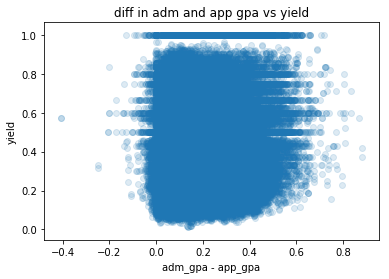

In [20]:
y, x = data_valid_yield['yield'], data_valid_yield['adm_app_gpa_diff']
plt.scatter(x, y, alpha=0.15)
plt.xlabel('adm_gpa - app_gpa')
plt.ylabel('yield')
plt.title('diff in adm and app gpa vs yield')

### Baseline Model

In [21]:
### Our Baseline Model

yield_baseline = data_valid_adm['yield'].mean()
yield_baseline

0.45060102602627916

Text(0.5,1,'adm_app_gpa_diff vs adm_rate')

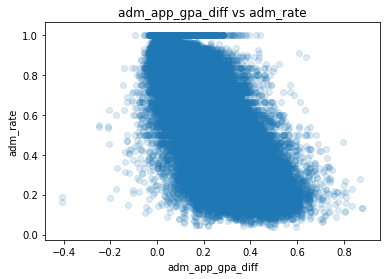

In [22]:
adm_app_gpa_diff, adm_rate = data_valid_yield['adm_app_gpa_diff'], data_valid_yield['adm_rate']
plt.scatter(adm_app_gpa_diff, adm_rate, alpha=0.15)
plt.xlabel('adm_app_gpa_diff')
plt.ylabel('adm_rate')
plt.title('adm_app_gpa_diff vs adm_rate')

### Yield Rate vs Year


In [23]:
def find_yield(yr):
    return data[data['year'] == yr]['yield'].mean()

(0.35, 0.55)

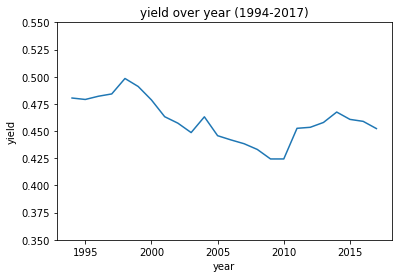

In [38]:
### check the yield over the years in overall

yield_yr = []
yr = np.arange(1994, 2018)

for y in yr:
    yield_yr.append(find_yield(y))
    
plt.plot(yr, yield_yr)
plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over year (1994-2017)')
plt.ylim(0.35, 0.55)

### Yield Rate vs Year for various races

In [25]:
def find_yield_race(race, yr):
    return data[(data['ethnicity'] == race) & (data['year'] == yr)]['yield'].mean()

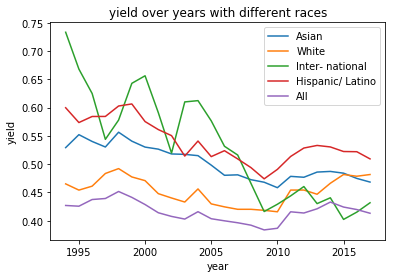

In [31]:
### check the yield for different races 

race = ['Asian', 'White', 'Inter- national', 'Hispanic/ Latino', 'All']
yield_race_yr = [[], [], [], [], []]

for i in range(0, len(race)):
    for y in yr:
        yield_race_yr[i].append(find_yield_race(race[i], y))

for i in range(0, len(race)):
    plt.plot(yr, yield_race_yr[i], label=race[i])

plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over years with different races')
plt.legend(bbox_to_anchor=(1., 1.0))

### Yield Rate over Year for different campuses 

In [27]:
def find_yield_campus(camp, yr):
    return data[(data['campus'] == camp) & (data['year'] == yr)]['yield'].mean()

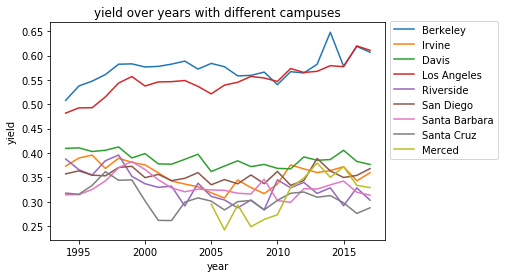

In [78]:
campus = ['Berkeley', 'Irvine', 'Davis', 'Los Angeles', 'Riverside', 'San Diego',
               'Santa Barbara', 'Santa Cruz', 'Merced']

yield_camp_yr = [[], [], [], [], [], [], [], [], []]

yr_reduced = np.arange(1994, 2018)

for i in range(0, len(campus)):
    for y in yr_reduced:
        yield_camp_yr[i].append(find_yield_campus(campus[i], y))

for i in range(0, len(campus)):
    plt.plot(yr_reduced, yield_camp_yr[i], label=campus[i])

plt.xlabel('year')
plt.ylabel('yield')
plt.title('yield over years with different campuses')
plt.legend(bbox_to_anchor=(1.0, 1.03))

### Yield Rate Distributions for different campuses 

In [69]:
def plot_probs(data, camp1, camp2):
    fig = plt.figure()
    # add the first subplot
    ax = fig.add_subplot(111)
    # extract the data from the dataframe
    camp1_values = data[data['campus']==camp1]['yield'].values
    camp1_values = camp1_values[~np.isnan(camp1_values)]
    # return the same shape of the data and but all the elements in 
    # the array are 1
    weights = np.ones_like(camp1_values)/len(camp1_values)
    # this is the histogram
    _ = ax.hist(camp1_values, alpha=0.3, label=[camp1], weights=weights)
    camp2_values = data[data['campus']==camp2]['yield'].values
    camp2_values = camp2_values[~np.isnan(camp2_values)]
    weights = np.ones_like(camp2_values)/len(camp2_values)
    _ = ax.hist(camp2_values, color='red', alpha=.3, label=camp2, weights=weights)
    ax.set_xlabel('yield rate', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.vlines(np.mean(camp1_values), 0.0, ax.get_ylim()[1], colors='b', linestyle='--', linewidth=4)
    ax.vlines(np.mean(camp2_values), 0.0, ax.get_ylim()[1], colors='r', linestyle='--', linewidth=4)
    ax.legend()

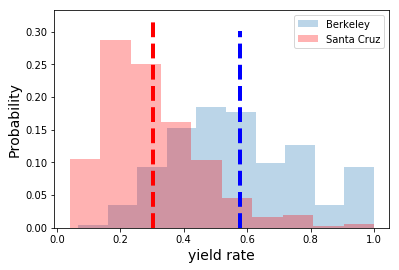

In [70]:
plot_probs(data, 'Berkeley', 'Santa Cruz')

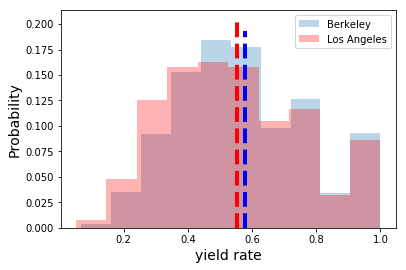

In [71]:
plot_probs(data, 'Berkeley', 'Los Angeles')

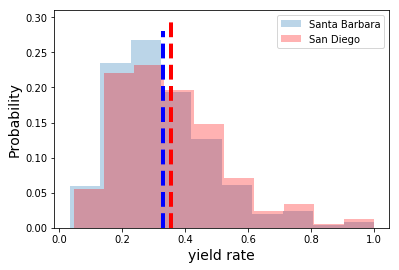

In [72]:
plot_probs(data, 'Santa Barbara', 'San Diego')

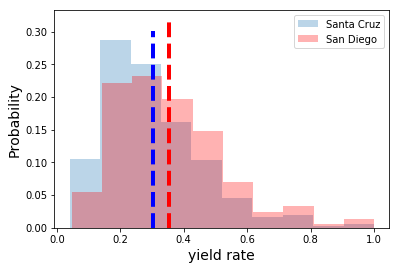

In [73]:
plot_probs(data, 'Santa Cruz', 'San Diego')

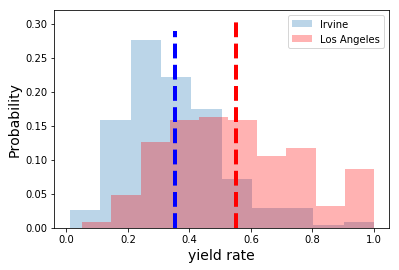

In [74]:
plot_probs(data, 'Irvine', 'Los Angeles')

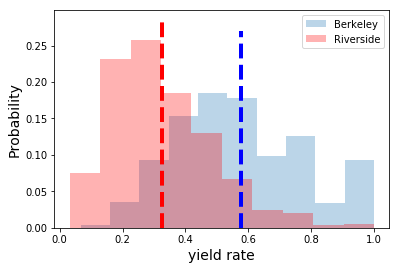

In [75]:
plot_probs(data, 'Berkeley', 'Riverside')

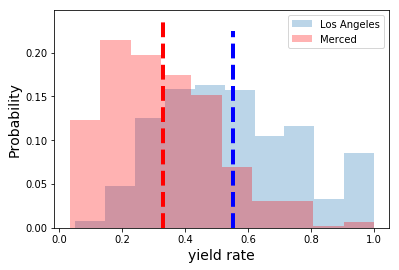

In [77]:
plot_probs(data, 'Los Angeles', 'Merced')